# Plotting the effect of every hyperparameter on the training results, and more

Note: this is the analysis for the training accuracies at the `fine_outputs_acc` key. If you instead want to see this analysis for the testing accuracies, it's here: 

- https://github.com/Vooban/Hyperopt-Keras-CNN-CIFAR-100/blob/master/AnalyzeTestHyperoptResults.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from functools import partial
import json
import os
import pprint

pp = pprint.PrettyPrinter(indent=4, width=100)

In [2]:
results_folder_path = "results"
results = sorted(os.listdir(results_folder_path))
results

['model_0.0841000030488_eb09e.txt.json',
 'model_0.336700011924_5396e.txt.json',
 'model_0.420600043416_33dfa.txt.json',
 'model_0.437999988109_bdece.txt.json',
 'model_0.473099984169_696ae.txt.json',
 'model_0.478500027955_8e1dd.txt.json',
 'model_0.488000036836_29340.txt.json',
 'model_0.498599992901_acf12.txt.json',
 'model_0.524199980557_9aaf8.txt.json',
 'model_0.540400000751_da611.txt.json',
 'model_0.543300019264_11d46.txt.json',
 'model_0.543599969923_f8118.txt.json',
 'model_0.543899966478_7ea81.txt.json',
 'model_0.55130002296_e6087.txt.json',
 'model_0.555000026554_b8dd8.txt.json',
 'model_0.55559999907_24921.txt.json',
 'model_0.572200036764_f5138.txt.json',
 'model_0.573700056314_b94f6.txt.json',
 'model_0.579400045127_3e505.txt.json',
 'model_0.587299974918_7809a.txt.json',
 'model_0.597599984944_306bc.txt.json',
 'model_0.600499987662_73a5c.txt.json',
 'model_0.607399974763_09476.txt.json',
 'model_0.607500024199_17ba7.txt.json',
 'model_0.611100006372_b047d.txt.json',
 

In [3]:
# Load results from disk
jsons = []
for file_name in results:
    file_path = os.path.join(results_folder_path, file_name)
    with open(file_path) as f:
        j = json.load(f)
    jsons.append(j)

print("Here are some useful keys in our dict/json structure:")    
pp.pprint(list(jsons[0].keys()))
pp.pprint(list(jsons[0]["history"].keys()))
pp.pprint(jsons[0]["space"])

Here are some useful keys in our dict/json structure:
[   'coarse_best_accuracy',
    'coarse_best_loss',
    'coarse_end_accuracy',
    'coarse_end_loss',
    'fine_best_accuracy',
    'fine_best_loss',
    'fine_end_accuracy',
    'fine_end_loss',
    'history',
    'loss',
    'model_name',
    'real_loss',
    'space',
    'status']
[   'coarse_outputs_acc',
    'coarse_outputs_loss',
    'fine_outputs_acc',
    'fine_outputs_loss',
    'loss',
    'val_coarse_outputs_acc',
    'val_coarse_outputs_loss',
    'val_fine_outputs_acc',
    'val_fine_outputs_loss',
    'val_loss']
{   'activation': 'relu',
    'batch_size': 340.0,
    'coarse_labels_weight': 0.2257877057338366,
    'conv_dropout_drop_proba': 0.017576933898239576,
    'conv_hiddn_units_mult': 0.9633014972395766,
    'conv_kernel_size': 4.0,
    'conv_pool_res_start_idx': 0.0,
    'fc_dropout_drop_proba': 0.5565420638427704,
    'fc_units_1_mult': 0.5904140789407973,
    'first_conv': 4,
    'l2_weight_reg_mult': 0.375336

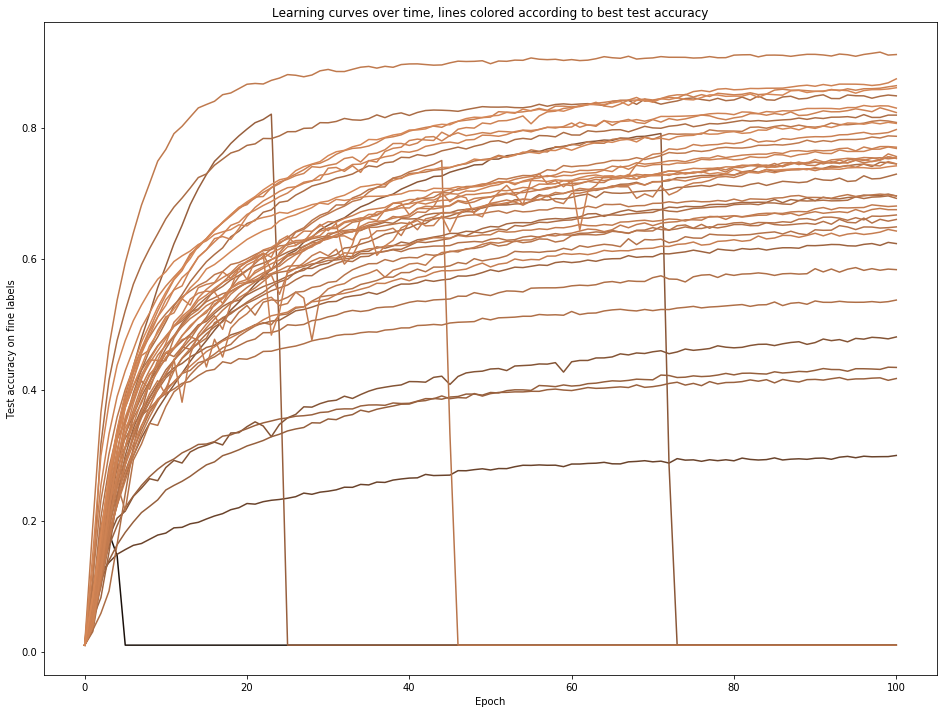

In [4]:
plt.figure(figsize=(16, 12))
for neural_net in jsons:
    accuracy = [1.0/100] + neural_net["history"]["fine_outputs_acc"]
    final_accuracy = neural_net["fine_best_accuracy"]
    plt.plot(accuracy, color=cm.copper(final_accuracy))

plt.xlabel('Epoch')
plt.ylabel('Test accuracy on fine labels')
plt.title("Learning curves over time, lines colored according to best test accuracy")
plt.show()

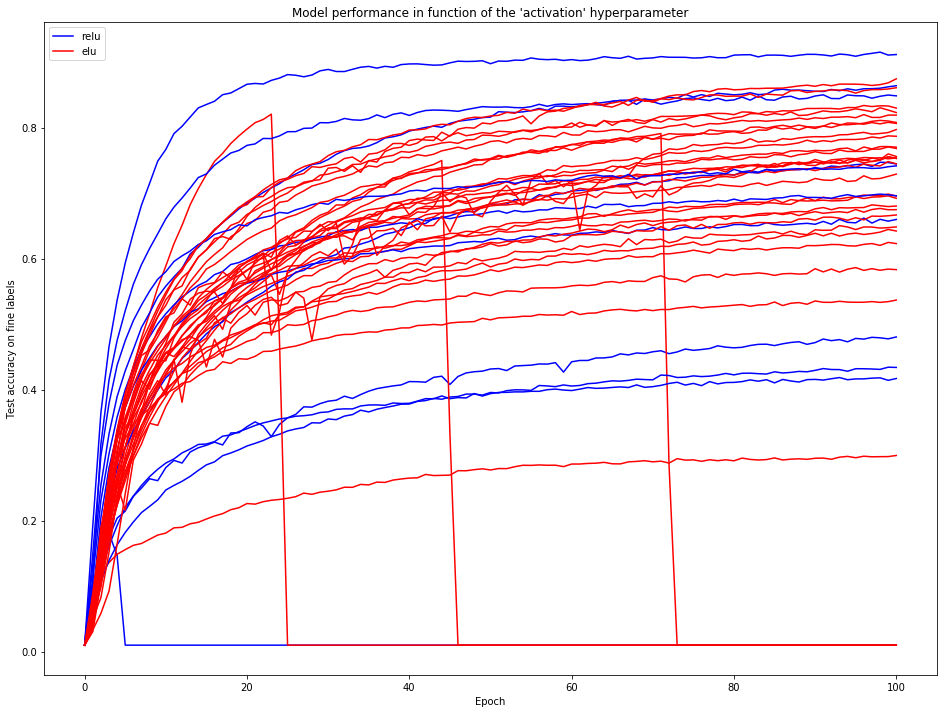

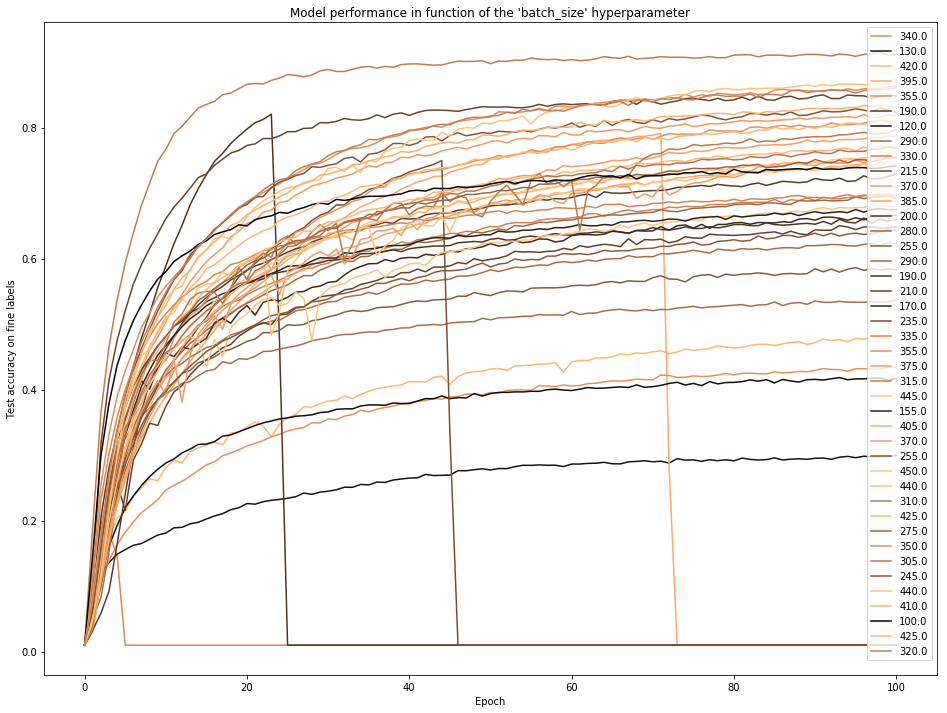

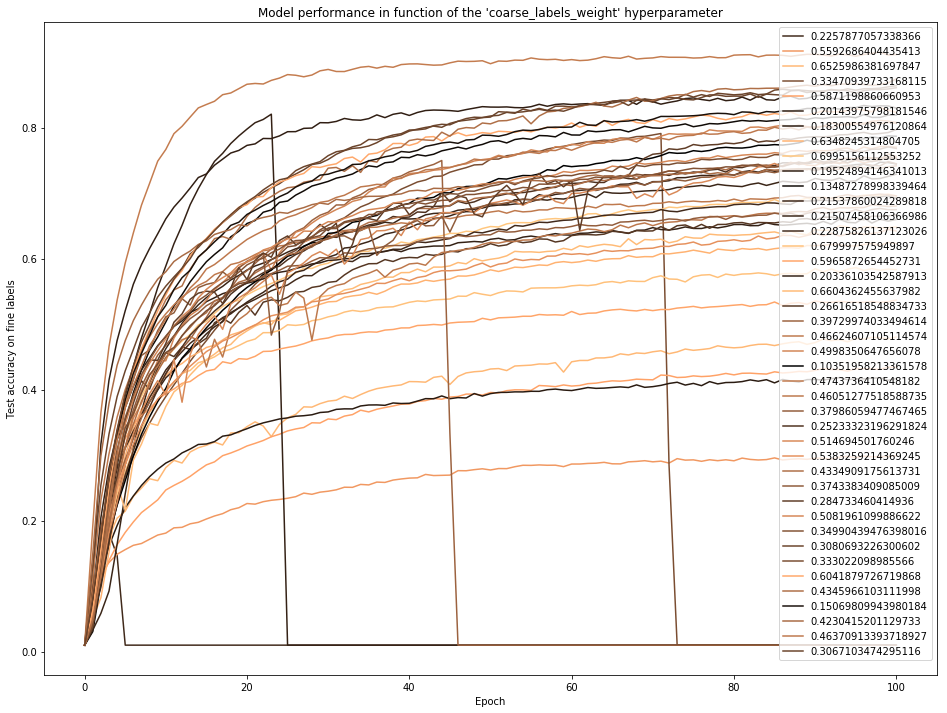

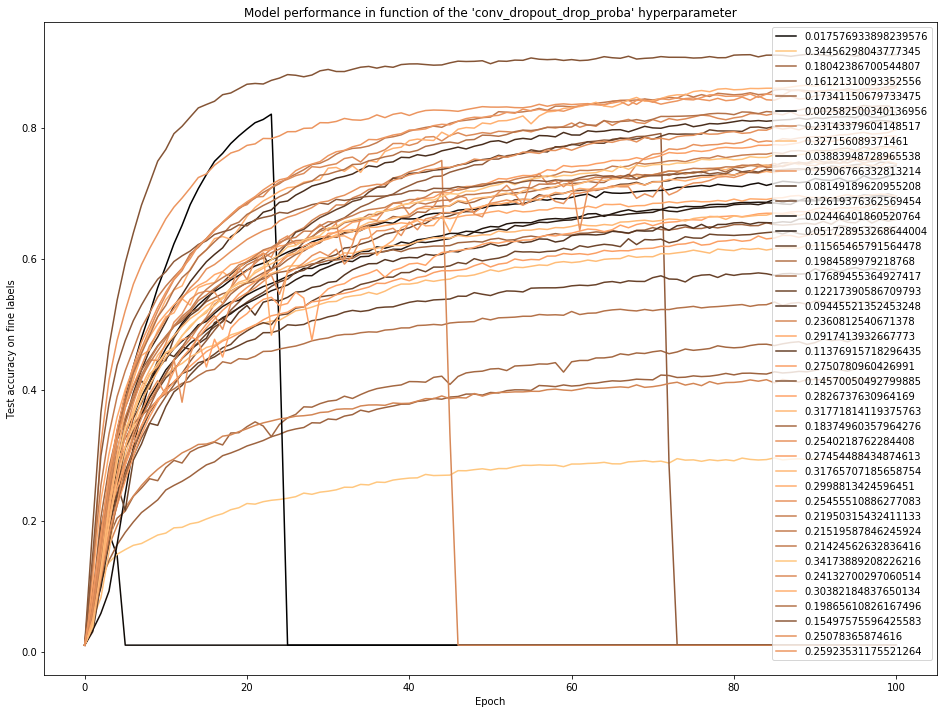

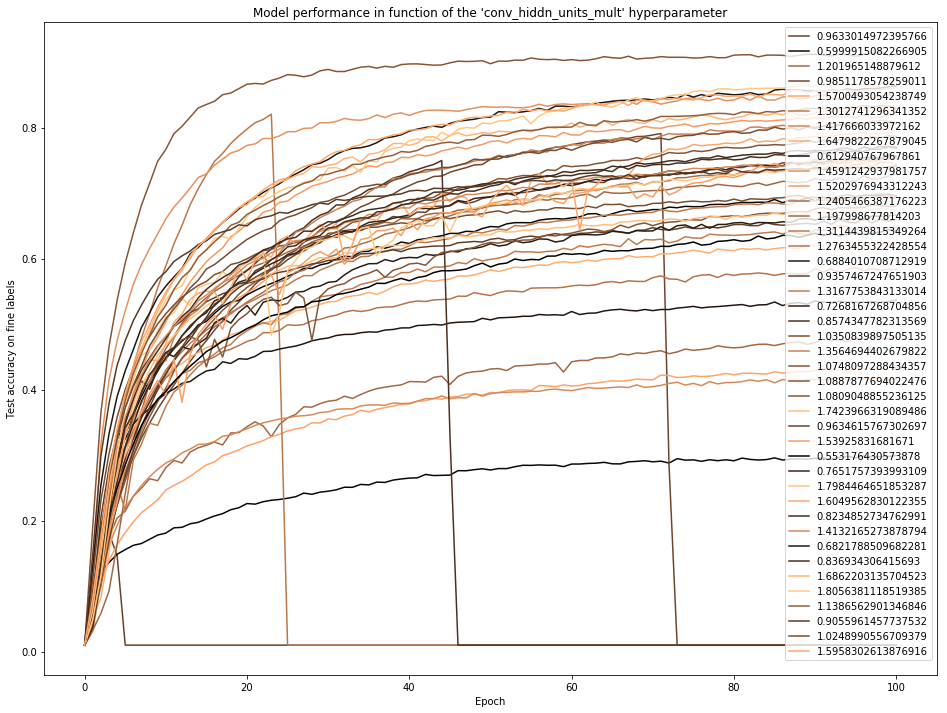

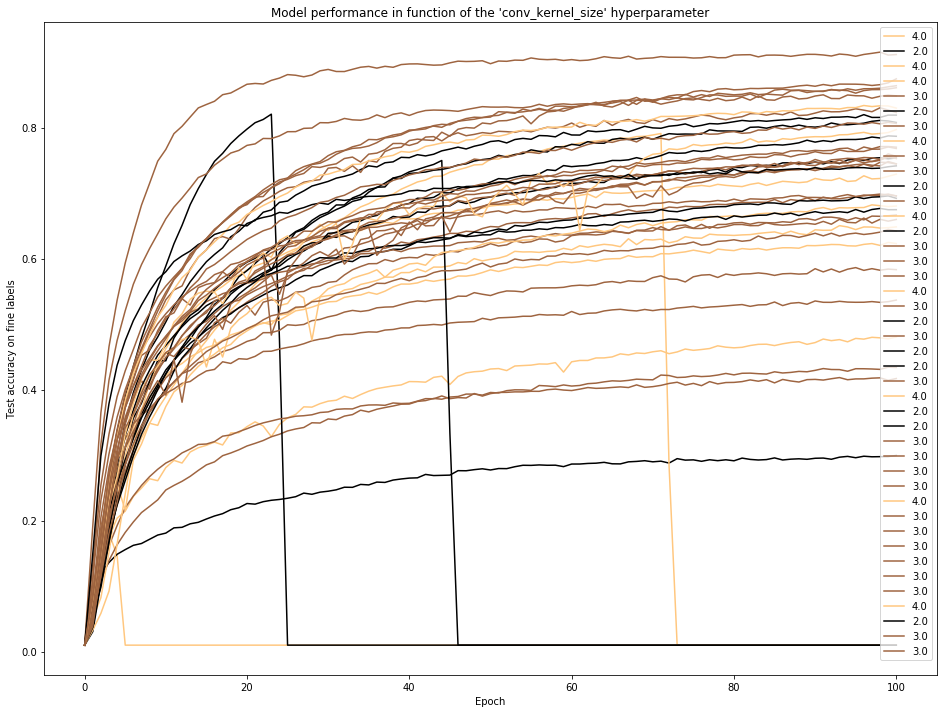

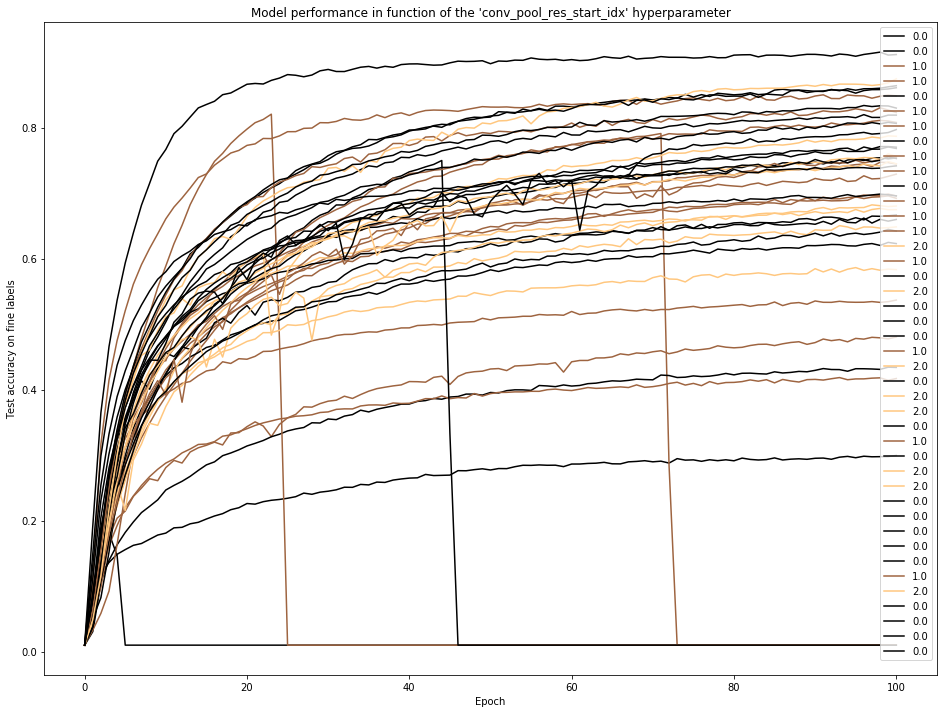

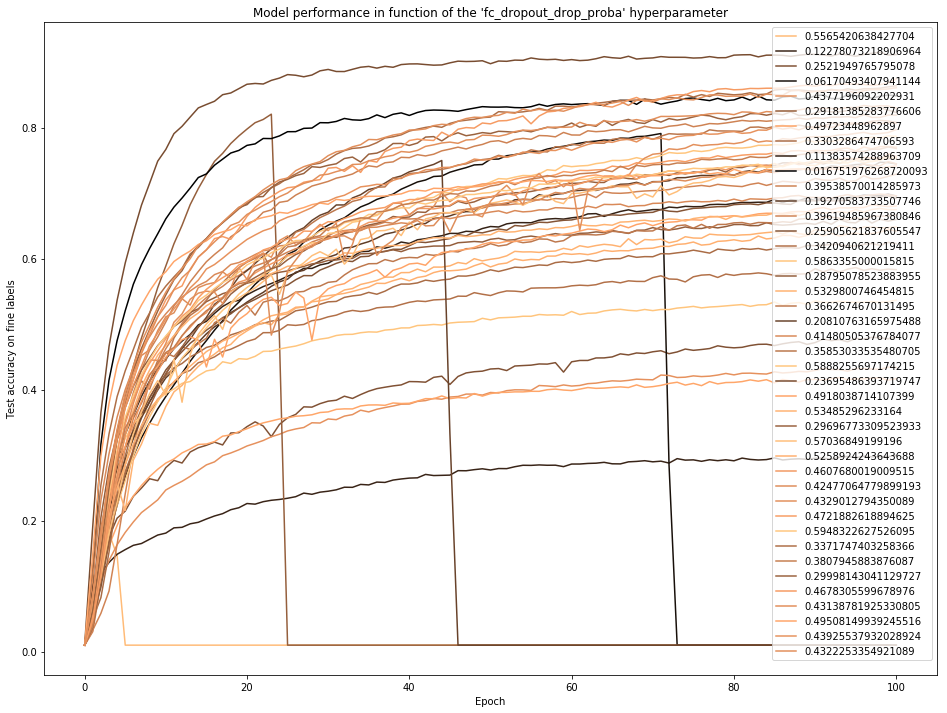

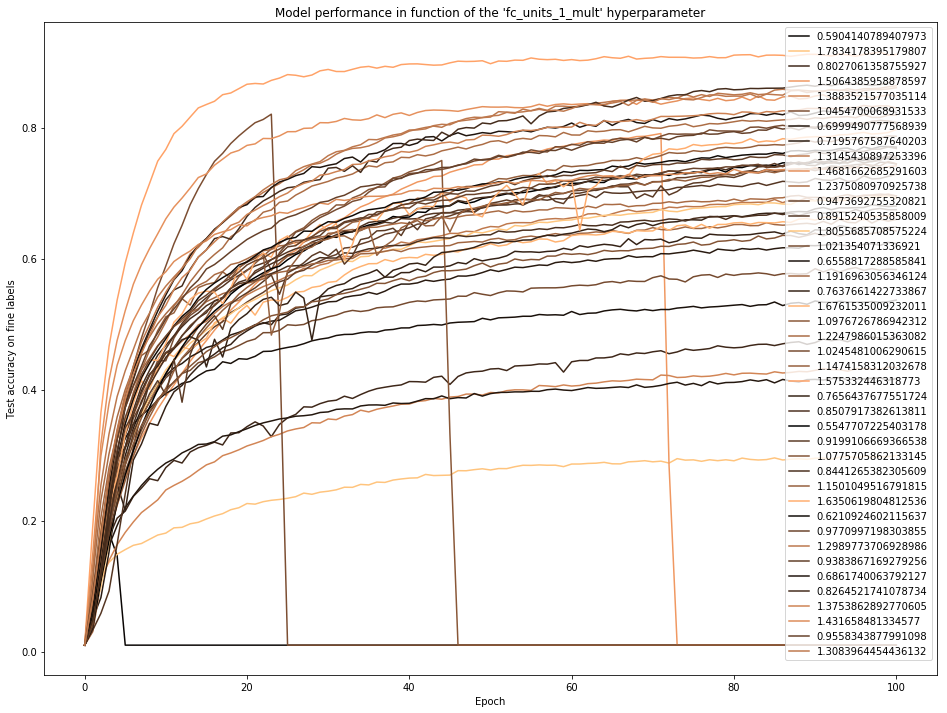

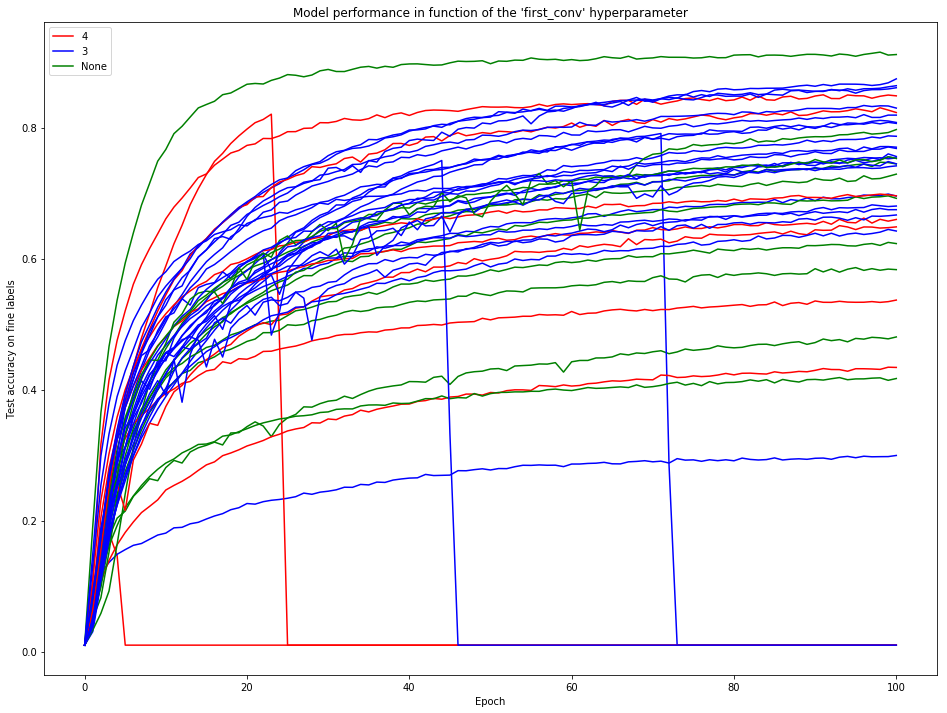

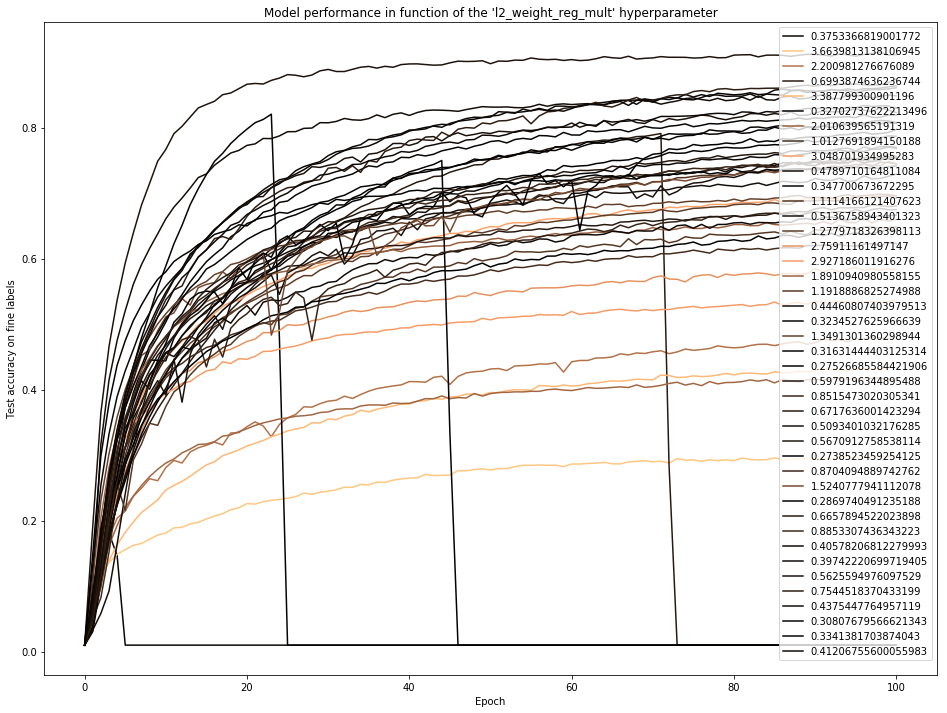

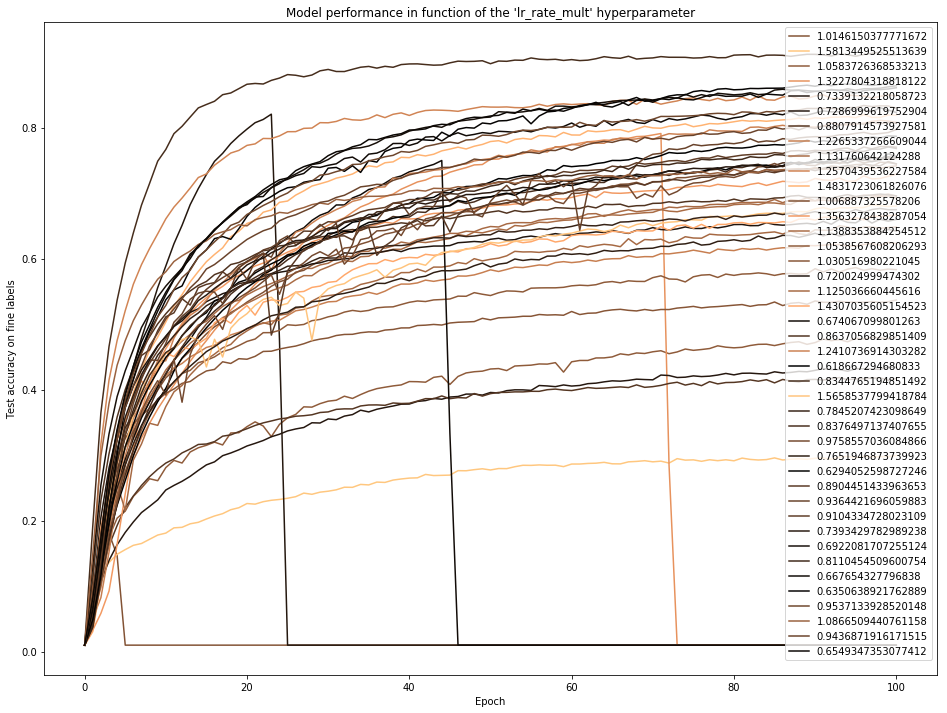

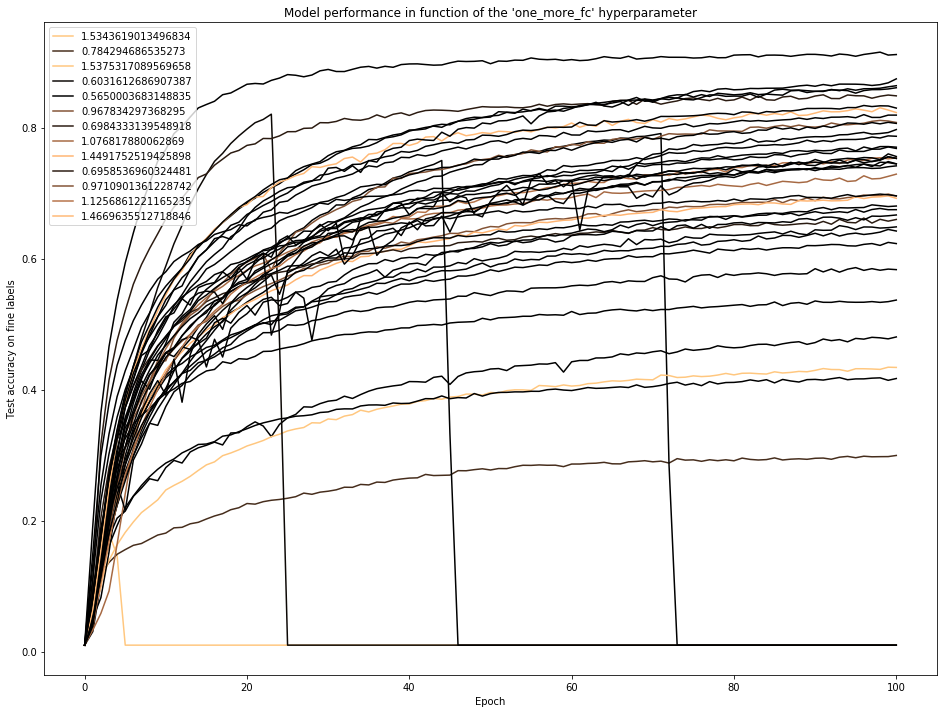

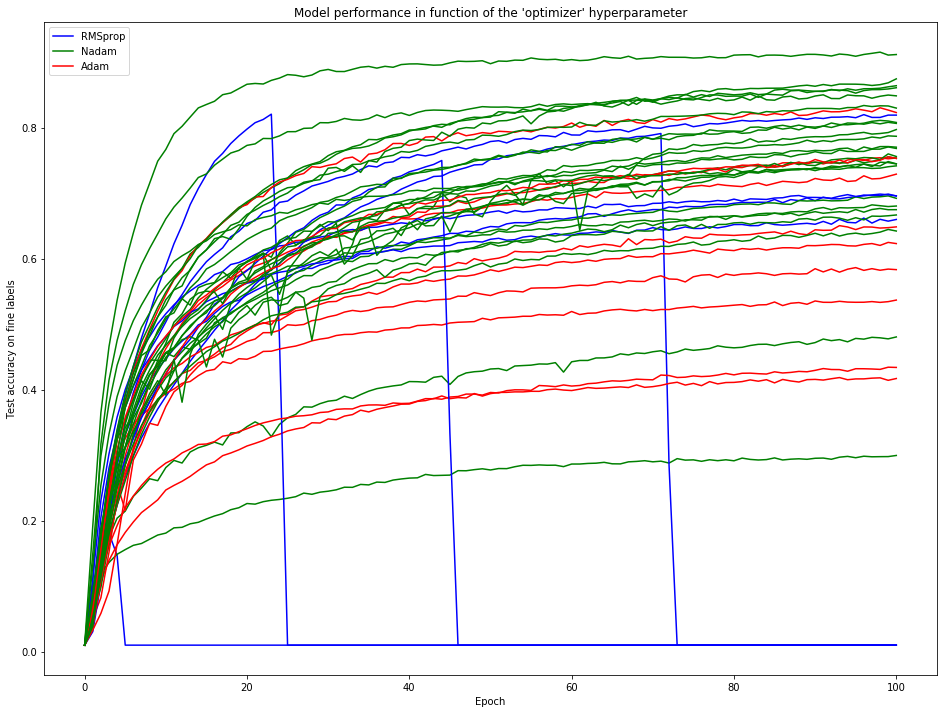

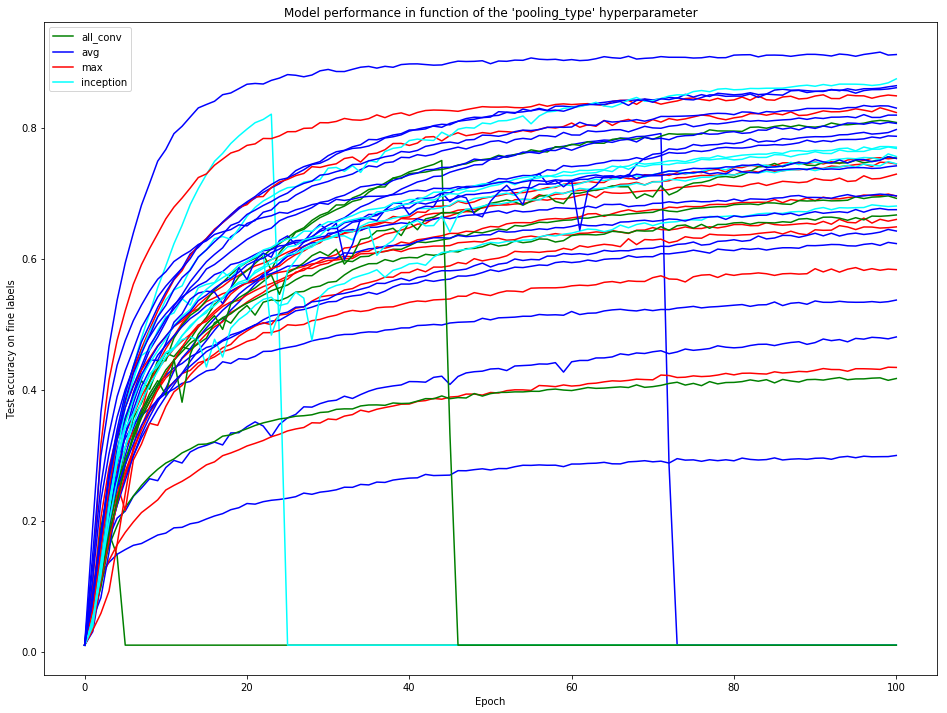

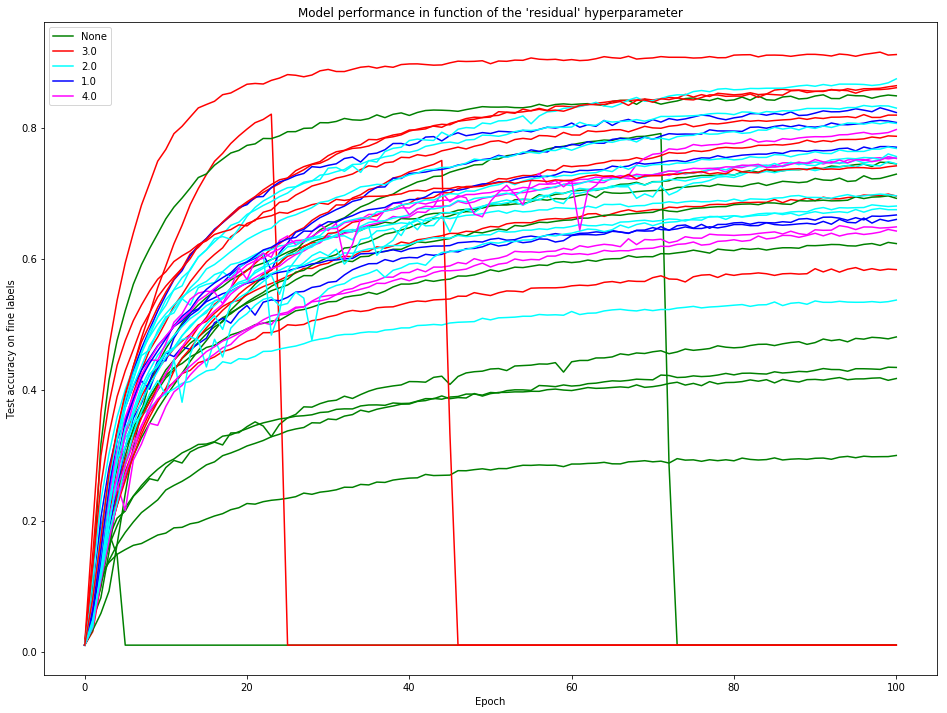

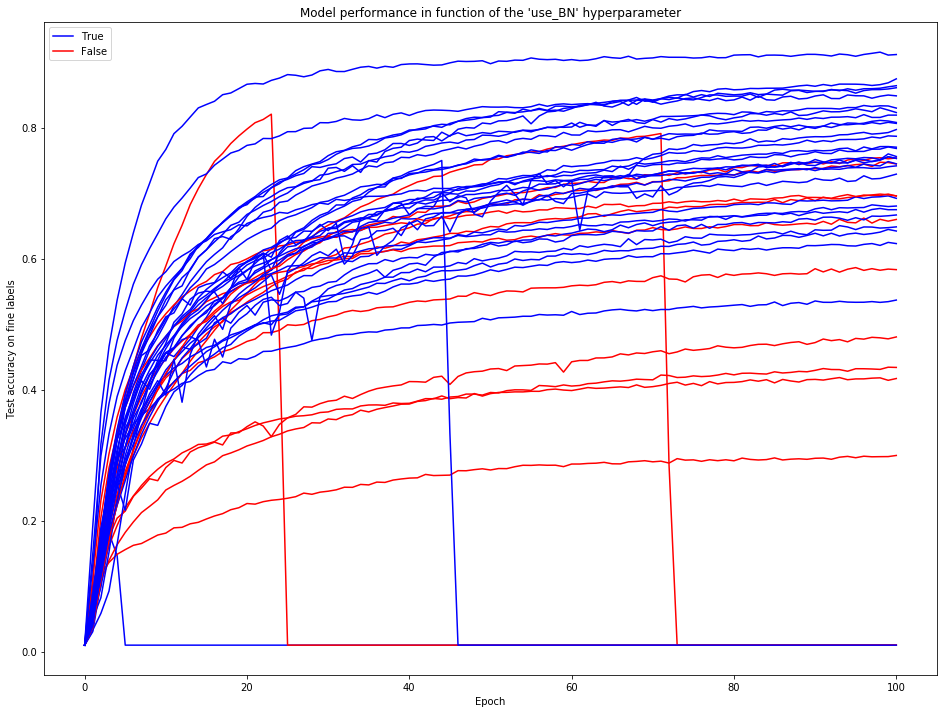

In [5]:
def discrete_set(accs, key_name, key_values):
    plt.figure(figsize=(16, 12))
    
    key_values = [str(i) for i in key_values]

    colors = ["red", "blue", "green", "cyan", "magenta", "yellow", "black"]
    colors_mapping = {x: colors[i] for i, x in enumerate(set(key_values))}
    
    already_used_labels = set()
    for accuracy, val in zip(accs, key_values):
        if val in already_used_labels:
            plt.plot(accuracy, color=colors_mapping[val])
        else:
            plt.plot(accuracy, color=colors_mapping[val], label=val)
            already_used_labels.update({val})

    plt.xlabel('Epoch')
    plt.ylabel('Test accuracy on fine labels')
    plt.title("Model performance in function of the '{}' hyperparameter".format(key_name))
    plt.legend()
    plt.show()

def int_val(accs, key_name, key_values):
    plt.figure(figsize=(16, 12))
    orig_kv = list(key_values)
    
    tmp_kval = [k for k in key_values if k is not None]
    min_val = min(tmp_kval)
    max_val = max(tmp_kval)
    for i, kv in enumerate(key_values):
        if kv is None:
            key_values[i] = "black"
            continue
        kv -= min_val
        kv = kv / (max_val - min_val)
        key_values[i] = float(kv)
    
    for accuracy, color, key_value in zip(accs, key_values, orig_kv):
        if type(color) is float: 
            color = cm.copper(color)
            plt.plot(accuracy, color=color, label=str(key_value))
        else:
            plt.plot(accuracy, color="black")
    
    plt.xlabel('Epoch')
    plt.ylabel('Test accuracy on fine labels')
    plt.title("Model performance in function of the '{}' hyperparameter".format(key_name))
    plt.legend()
    plt.show()

plot_function_map_from_key = {
    'activation': discrete_set,
    'batch_size': int_val,
    'coarse_labels_weight': int_val,
    'conv_dropout_drop_proba': int_val,
    'conv_hiddn_units_mult': int_val,
    'conv_kernel_size': int_val,
    'conv_pool_res_start_idx': int_val,
    'fc_dropout_drop_proba': int_val,
    'fc_units_1_mult': int_val,
    'first_conv': discrete_set,
    'l2_weight_reg_mult': int_val,
    'lr_rate_mult': int_val,
    'nb_conv_pool_layers': discrete_set,
    'one_more_fc': int_val,
    'optimizer': discrete_set,
    'pooling_type': discrete_set,
    'res_conv_kernel_size': int_val,
    'residual': discrete_set,
    'use_BN': discrete_set,
}

for key, plot_func in plot_function_map_from_key.items():    
    accs = [
        [1.0/100] + neural_net["history"]["fine_outputs_acc"] for neural_net in jsons
    ]
    key_values = [
        neural_net["space"][key] for neural_net in jsons
    ]
    plot_func(accs, key, key_values)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# We chose just a few params to inspect not to bloat the scatterplot:
int_params_names_to_correlate = [
    'batch_size',
    'coarse_labels_weight',
    'conv_dropout_drop_proba',
    'conv_hiddn_units_mult',
    'conv_kernel_size',
    'conv_pool_res_start_idx',
    'fc_dropout_drop_proba',
    'fc_units_1_mult',
    'l2_weight_reg_mult',
    'lr_rate_mult',
    'one_more_fc',
    'res_conv_kernel_size',
]

params_values = [[neural_net["space"][p] for neural_net in jsons] for p in int_params_names_to_correlate]
best_accs = [neural_net["fine_best_accuracy"] for neural_net in jsons]


def scatterplot_matrix_colored(params_names, params_values, best_accs, blur=False):
    """Scatterplot colored according to the Z values of the points."""
    
    nb_params = len(params_values)
    best_accs = np.array(best_accs)
    norm = matplotlib.colors.Normalize(vmin=best_accs.min(), vmax=best_accs.max())
    
    fig, ax = plt.subplots(nb_params, nb_params, figsize=(16, 16))#, facecolor=bg_color, edgecolor=fg_color)
    
    for i in range(nb_params):
        p1 = params_values[i]
        for j in range(nb_params):
            p2 = params_values[j]
            
            axes = ax[i, j]
            # Subplot:
            if blur:
                s = axes.scatter(p2, p1, s=400, alpha=.1,
                                 c=best_accs, cmap='viridis', norm=norm)
                s = axes.scatter(p2, p1, s=200, alpha=.2,
                                 c=best_accs, cmap='viridis', norm=norm)
                s = axes.scatter(p2, p1, s=100, alpha=.3,
                                 c=best_accs, cmap='viridis', norm=norm)
            s = axes.scatter(p2, p1, s=15,
                             c=best_accs, cmap='viridis', norm=norm)

            # Labels only on side subplots, for x and y:
            if j == 0:
                axes.set_ylabel(params_names[i], rotation=0)
            else:
                axes.set_yticks([])
            
            if i == nb_params - 1:
                axes.set_xlabel(params_names[j], rotation=90)
            else:
                axes.set_xticks([])

    fig.subplots_adjust(right=0.82, top=0.95)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    cb = fig.colorbar(s, cax=cbar_ax)
    
    plt.suptitle('Scatterplot matrix of tried values in the search space over different params, colored in function of best test accuracy')
    plt.show()


scatterplot_matrix_colored(int_params_names_to_correlate, params_values, best_accs, blur=True)
scatterplot_matrix_colored(int_params_names_to_correlate, params_values, best_accs, blur=False)


Not plotting with some built-in functions.
Remember that the loss is the negative of the test accuracy on fine labels.

avg best error: -0.6761000108718872


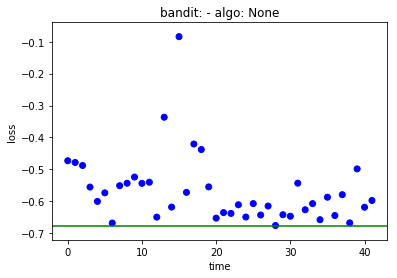

Showing Histogram of 42 jobs


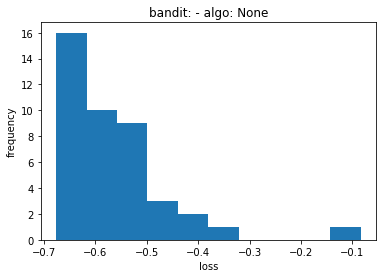

In [7]:
from hyperopt.plotting import main_plot_history, main_plot_histogram

import pickle 

trials = pickle.load(open("results.pkl", "rb"))

print("Not plotting with some built-in functions.")
print("Remember that the loss is the negative of the test accuracy on fine labels.\n")

main_plot_history(trials)
main_plot_histogram(trials)